#  **Housing Prices Analysis in Top Tier Cities in India**

---



## <pre> Mounting Google Drive into Google Colab </pre>

In [105]:
from google.colab import drive

In [106]:
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [107]:
!ls '/content/gdrive/My Drive/Projects/IndianHousingPrices/Data'

Bangalore.csv	       Delhi.csv	  Mumbai.csv
bangalore_updated.csv  delhi_updated.csv  mumbai_updated.csv


***

### <pre>Importing Required Libraries</pre>

In [108]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from geopy.geocoders import Nominatim
import folium
from folium import plugins

%matplotlib inline

***

![Bangalore Image](https://media.giphy.com/media/LnWAqDfCpfPSmnedvT/giphy.gif)

In [109]:
bangalore_df = pd.read_csv('/content/gdrive/My Drive/Projects/IndianHousingPrices/Data/Bangalore.csv')

In [110]:
bangalore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6207 entries, 0 to 6206
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                6207 non-null   int64 
 1   Area                 6207 non-null   int64 
 2   Location             6207 non-null   object
 3   No. of Bedrooms      6207 non-null   int64 
 4   Resale               6207 non-null   int64 
 5   MaintenanceStaff     6207 non-null   int64 
 6   Gymnasium            6207 non-null   int64 
 7   SwimmingPool         6207 non-null   int64 
 8   LandscapedGardens    6207 non-null   int64 
 9   JoggingTrack         6207 non-null   int64 
 10  RainWaterHarvesting  6207 non-null   int64 
 11  IndoorGames          6207 non-null   int64 
 12  ShoppingMall         6207 non-null   int64 
 13  Intercom             6207 non-null   int64 
 14  SportsFacility       6207 non-null   int64 
 15  ATM                  6207 non-null   int64 
 16  ClubHo

In [111]:
bangalore_df.sample(5)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
4292,3100000,1232,Narayanapura on Hennur Main Road,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
5869,5750000,995,Gottigere,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
308,15000000,1795,Sahakar Nagar,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
328,11000000,1335,JP Nagar Phase 7,2,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2882,9410000,1350,Kumaraswamy Layout,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


***

![Delhi Image](https://media.giphy.com/media/hSEwaRIfSa4np4l5d5/giphy.gif)

In [112]:
delhi_df = pd.read_csv('/content/gdrive/My Drive/Projects/IndianHousingPrices/Data/Delhi.csv')

In [113]:
delhi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                4998 non-null   int64 
 1   Area                 4998 non-null   int64 
 2   Location             4998 non-null   object
 3   No. of Bedrooms      4998 non-null   int64 
 4   Resale               4998 non-null   int64 
 5   MaintenanceStaff     4998 non-null   int64 
 6   Gymnasium            4998 non-null   int64 
 7   SwimmingPool         4998 non-null   int64 
 8   LandscapedGardens    4998 non-null   int64 
 9   JoggingTrack         4998 non-null   int64 
 10  RainWaterHarvesting  4998 non-null   int64 
 11  IndoorGames          4998 non-null   int64 
 12  ShoppingMall         4998 non-null   int64 
 13  Intercom             4998 non-null   int64 
 14  SportsFacility       4998 non-null   int64 
 15  ATM                  4998 non-null   int64 
 16  ClubHo

In [114]:
delhi_df.sample(5)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
1677,20500000,1800,Saket,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
238,22000000,2200,Sector 11 Dwarka,4,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1067,2600000,450,Dwarka Mor,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4669,3750000,550,Uttam Nagar,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
4800,4500000,750,Munirka,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


***

![Mumbai Image](https://media.giphy.com/media/STrgyibuarMZKHDQms/giphy.gif)

In [115]:
mumbai_df = pd.read_csv('/content/gdrive/My Drive/Projects/IndianHousingPrices/Data/Mumbai.csv')

In [116]:
mumbai_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7719 entries, 0 to 7718
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                7719 non-null   int64 
 1   Area                 7719 non-null   int64 
 2   Location             7719 non-null   object
 3   No. of Bedrooms      7719 non-null   int64 
 4   Resale               7719 non-null   int64 
 5   MaintenanceStaff     7719 non-null   int64 
 6   Gymnasium            7719 non-null   int64 
 7   SwimmingPool         7719 non-null   int64 
 8   LandscapedGardens    7719 non-null   int64 
 9   JoggingTrack         7719 non-null   int64 
 10  RainWaterHarvesting  7719 non-null   int64 
 11  IndoorGames          7719 non-null   int64 
 12  ShoppingMall         7719 non-null   int64 
 13  Intercom             7719 non-null   int64 
 14  SportsFacility       7719 non-null   int64 
 15  ATM                  7719 non-null   int64 
 16  ClubHo

In [117]:
mumbai_df.sample(5)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
473,2700000,350,Sector 21 Kharghar,1,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7177,4700000,300,Andheri East,1,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
5848,5500000,1818,Malad East,3,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
379,5000000,600,Sector 22 Kamothe,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2682,2900000,555,Bhandup West,1,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


<pre>We have imported Bangalore, Delhi & Mumbai Datasets, 
and it shows that there are some 40 variables/features in the data including the Price.</pre>

As per the Data Definition, `Price`, `Area`, `Location` & `Bedrooms` are Numerical/Continuous variables, rest all are Categorical Variables.
But these Categorical variables have three types of values, <br>
<code>0 = Particular facility is absent in the House</code><br>
<code>1 = Particular facility is present in the House</code><br>
<code>9 = No information is available for the variable, whether it is present or not</code>

***

### <pre>Handling Missing Values</pre>

In [118]:
bangalore_df.replace(9,np.nan, inplace=True)
delhi_df.replace(9,np.nan, inplace=True)
mumbai_df.replace(9,np.nan, inplace=True)

In [119]:
bangalore_df.dropna(axis=0, inplace=True)
delhi_df.dropna(axis=0, inplace=True)
mumbai_df.dropna(axis=0, inplace=True)

In [120]:
bangalore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1951 entries, 0 to 1950
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                1951 non-null   int64  
 1   Area                 1951 non-null   int64  
 2   Location             1951 non-null   object 
 3   No. of Bedrooms      1951 non-null   int64  
 4   Resale               1951 non-null   int64  
 5   MaintenanceStaff     1951 non-null   float64
 6   Gymnasium            1951 non-null   float64
 7   SwimmingPool         1951 non-null   float64
 8   LandscapedGardens    1951 non-null   float64
 9   JoggingTrack         1951 non-null   float64
 10  RainWaterHarvesting  1951 non-null   float64
 11  IndoorGames          1951 non-null   float64
 12  ShoppingMall         1951 non-null   float64
 13  Intercom             1951 non-null   float64
 14  SportsFacility       1951 non-null   float64
 15  ATM                  1951 non-null   f

In [121]:
delhi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2002 entries, 0 to 2001
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                2002 non-null   int64  
 1   Area                 2002 non-null   int64  
 2   Location             2002 non-null   object 
 3   No. of Bedrooms      2002 non-null   int64  
 4   Resale               2002 non-null   int64  
 5   MaintenanceStaff     2002 non-null   float64
 6   Gymnasium            2002 non-null   float64
 7   SwimmingPool         2002 non-null   float64
 8   LandscapedGardens    2002 non-null   float64
 9   JoggingTrack         2002 non-null   float64
 10  RainWaterHarvesting  2002 non-null   float64
 11  IndoorGames          2002 non-null   float64
 12  ShoppingMall         2002 non-null   float64
 13  Intercom             2002 non-null   float64
 14  SportsFacility       2002 non-null   float64
 15  ATM                  2002 non-null   f

In [122]:
mumbai_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1398 entries, 0 to 1397
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                1398 non-null   int64  
 1   Area                 1398 non-null   int64  
 2   Location             1398 non-null   object 
 3   No. of Bedrooms      1398 non-null   int64  
 4   Resale               1398 non-null   int64  
 5   MaintenanceStaff     1398 non-null   float64
 6   Gymnasium            1398 non-null   float64
 7   SwimmingPool         1398 non-null   float64
 8   LandscapedGardens    1398 non-null   float64
 9   JoggingTrack         1398 non-null   float64
 10  RainWaterHarvesting  1398 non-null   float64
 11  IndoorGames          1398 non-null   float64
 12  ShoppingMall         1398 non-null   float64
 13  Intercom             1398 non-null   float64
 14  SportsFacility       1398 non-null   float64
 15  ATM                  1398 non-null   f

We performed some Cleaning Process, and removed the Missing values,i.e. `9s` from all the categorical values, because it contains a big portion of the data as missing, so it cannot be imputed with majority category of the variable, it may impact the analysis.
In order to do that we converted all `9s` to `NaN` values and removed those rows.
As a result we are left with `1951` entries in Bangalore, `2002` entries in Delhi & `1398` entries in Mumbai Data to perform the further analysis.

***

#### Variable Conversions

In [123]:
bangalore_df.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')

In [124]:
NonFloatColumns = ['Price','Area','Location','No. of Bedrooms']
ColumnsToConvert = []
for col in bangalore_df.columns:
    if col not in NonFloatColumns:
        ColumnsToConvert.append(col)
ColumnsToConvert

['Resale',
 'MaintenanceStaff',
 'Gymnasium',
 'SwimmingPool',
 'LandscapedGardens',
 'JoggingTrack',
 'RainWaterHarvesting',
 'IndoorGames',
 'ShoppingMall',
 'Intercom',
 'SportsFacility',
 'ATM',
 'ClubHouse',
 'School',
 '24X7Security',
 'PowerBackup',
 'CarParking',
 'StaffQuarter',
 'Cafeteria',
 'MultipurposeRoom',
 'Hospital',
 'WashingMachine',
 'Gasconnection',
 'AC',
 'Wifi',
 "Children'splayarea",
 'LiftAvailable',
 'BED',
 'VaastuCompliant',
 'Microwave',
 'GolfCourse',
 'TV',
 'DiningTable',
 'Sofa',
 'Wardrobe',
 'Refrigerator']

While Handling Missing Values, we realized that the Categorical Variables(By Definition) are actually Numeric in nature, so we identified the list of all those columns and below we will convert them to required DataType, i.e. Object(String)

In [125]:
bangalore_df[ColumnsToConvert] = bangalore_df[ColumnsToConvert].astype(str)
delhi_df[ColumnsToConvert] = delhi_df[ColumnsToConvert].astype(str)
mumbai_df[ColumnsToConvert] = mumbai_df[ColumnsToConvert].astype(str)

In [126]:
replace_dict = {'0':'No','1':'Yes','0.0':'No','1.0':'Yes'}
bangalore_df[ColumnsToConvert] = bangalore_df[ColumnsToConvert].replace(replace_dict)
delhi_df[ColumnsToConvert] = delhi_df[ColumnsToConvert].replace(replace_dict)
mumbai_df[ColumnsToConvert] = mumbai_df[ColumnsToConvert].replace(replace_dict)

In [127]:
bangalore_df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,No,Yes,Yes,Yes,Yes,Yes,...,Yes,No,No,No,No,No,No,No,No,No
1,7888000,1045,Dasarahalli on Tumkur Road,2,No,No,Yes,Yes,Yes,Yes,...,Yes,No,Yes,No,No,No,No,No,No,No
2,4866000,1179,Kannur on Thanisandra Main Road,2,No,No,Yes,Yes,Yes,Yes,...,Yes,No,No,No,No,No,No,No,No,No
3,8358000,1675,Doddanekundi,3,No,No,No,No,No,No,...,Yes,No,No,No,No,No,No,No,No,No
4,6845000,1670,Kengeri,3,No,Yes,Yes,Yes,Yes,Yes,...,Yes,No,No,No,No,No,No,No,No,No


In [128]:
delhi_df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,10500000,1200,Sector 10 Dwarka,2,Yes,No,Yes,No,No,Yes,...,Yes,No,Yes,No,No,No,No,No,No,No
1,6000000,1000,Uttam Nagar,3,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,15000000,1350,Sarita Vihar,2,Yes,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,2500000,435,Uttam Nagar,2,No,No,No,No,No,No,...,No,No,Yes,No,No,No,No,No,No,No
4,5800000,900,Dwarka Mor,3,No,No,No,No,No,No,...,Yes,No,No,No,No,No,No,No,No,No


In [129]:
mumbai_df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,4850000,720,Kharghar,1,Yes,Yes,No,No,No,No,...,Yes,No,Yes,No,No,No,No,No,No,No
1,4500000,600,Kharghar,1,Yes,Yes,Yes,Yes,No,Yes,...,Yes,No,Yes,No,No,No,No,No,No,No
2,6700000,650,Kharghar,1,Yes,Yes,Yes,Yes,No,Yes,...,Yes,No,Yes,No,No,No,No,No,No,No
3,4500000,650,Kharghar,1,Yes,Yes,No,No,Yes,No,...,Yes,Yes,Yes,No,No,No,No,No,Yes,No
4,5000000,665,Kharghar,1,Yes,Yes,No,No,Yes,No,...,Yes,No,Yes,No,No,No,No,No,No,No


***

#### Feature Scaling

`Price`, `Area` & `Bedrooms` are only Numerical Variables in our data, but they are not of same order, like Price is having very high values, so it is difficult to interpret them with `Area` & `Bedrooms` on plots. So we will take them on the same scale

In [130]:
# Converting Price to Tens of Lacs
bangalore_df.Price = bangalore_df.Price/100000
delhi_df.Price = delhi_df.Price/100000
mumbai_df.Price = mumbai_df.Price/100000

In [131]:
#Converting Area to Hundreds of Sq feet
bangalore_df.Area = bangalore_df.Area/100
delhi_df.Area = delhi_df.Area/100
mumbai_df.Area = mumbai_df.Area/100

In [132]:
bangalore_df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,300.00,33.40,JP Nagar Phase 1,4,No,Yes,Yes,Yes,Yes,Yes,...,Yes,No,No,No,No,No,No,No,No,No
1,78.88,10.45,Dasarahalli on Tumkur Road,2,No,No,Yes,Yes,Yes,Yes,...,Yes,No,Yes,No,No,No,No,No,No,No
2,48.66,11.79,Kannur on Thanisandra Main Road,2,No,No,Yes,Yes,Yes,Yes,...,Yes,No,No,No,No,No,No,No,No,No
3,83.58,16.75,Doddanekundi,3,No,No,No,No,No,No,...,Yes,No,No,No,No,No,No,No,No,No
4,68.45,16.70,Kengeri,3,No,Yes,Yes,Yes,Yes,Yes,...,Yes,No,No,No,No,No,No,No,No,No


In [133]:
bangalore_df.describe()

,Price,Area,No. of Bedrooms
count,1951.000000,1951.000000,1951.000000
mean,99.530030,15.156028,2.532035
std,129.301584,7.640693,0.677002
min,20.960000,5.250000,1.000000
25%,49.735000,11.470000,2.000000
50%,69.500000,13.300000,3.000000
75%,100.000000,16.100000,3.000000
max,2027.000000,99.000000,5.000000


In [134]:
delhi_df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,105.0,12.00,Sector 10 Dwarka,2,Yes,No,Yes,No,No,Yes,...,Yes,No,Yes,No,No,No,No,No,No,No
1,60.0,10.00,Uttam Nagar,3,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,150.0,13.50,Sarita Vihar,2,Yes,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,25.0,4.35,Uttam Nagar,2,No,No,No,No,No,No,...,No,No,Yes,No,No,No,No,No,No,No
4,58.0,9.00,Dwarka Mor,3,No,No,No,No,No,No,...,Yes,No,No,No,No,No,No,No,No,No


In [135]:
delhi_df.describe()

,Price,Area,No. of Bedrooms
count,2002.000000,2002.000000,2002.000000
mean,102.947158,12.001414,2.688811
std,91.198484,6.143408,0.729588
min,20.000000,2.000000,1.000000
25%,36.000000,7.200000,2.000000
50%,70.000000,10.000000,3.000000
75%,155.000000,17.000000,3.000000
max,1625.000000,64.000000,5.000000


In [136]:
mumbai_df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,48.5,7.20,Kharghar,1,Yes,Yes,No,No,No,No,...,Yes,No,Yes,No,No,No,No,No,No,No
1,45.0,6.00,Kharghar,1,Yes,Yes,Yes,Yes,No,Yes,...,Yes,No,Yes,No,No,No,No,No,No,No
2,67.0,6.50,Kharghar,1,Yes,Yes,Yes,Yes,No,Yes,...,Yes,No,Yes,No,No,No,No,No,No,No
3,45.0,6.50,Kharghar,1,Yes,Yes,No,No,Yes,No,...,Yes,Yes,Yes,No,No,No,No,No,Yes,No
4,50.0,6.65,Kharghar,1,Yes,Yes,No,No,Yes,No,...,Yes,No,Yes,No,No,No,No,No,No,No


In [137]:
mumbai_df.describe()

,Price,Area,No. of Bedrooms
count,1398.000000,1398.000000,1398.000000
mean,154.244542,10.747346,1.958512
std,252.926812,5.908541,0.870906
min,20.000000,2.450000,1.000000
25%,55.000000,6.500000,1.000000
50%,99.500000,10.110000,2.000000
75%,168.000000,13.100000,3.000000
max,4000.000000,70.000000,6.000000


***

#### Plotting & Analysis

According the variables, we have figured out 2 different Categories for the Variables as <br>
- `Important Amenities` like `Club House`,`Gym`,`SwimmingPool`,etc. <br>
- `Furnishing` like `Sofa`,`Wardrobe`,`TV`,etc. So that we can analyze different categories and their impact on the Price.

In [138]:
ImpAmenitiesColumns = ['Resale','Gymnasium','SwimmingPool','ClubHouse','School','24X7Security','PowerBackup','CarParking','Hospital']
FurnishingColumns = ['DiningTable','Sofa','Wardrobe','Refrigerator','Microwave','TV','BED','AC','Wifi','Gasconnection']

In [139]:
# Function for plotting Imp Amenities as HUE with Price and Area

def ImpAmenitiesPlot(df):
  fig, axes = plt.subplots(3,3, figsize=(18,9))
  
  col = 0
  for i in range(3):
    for j in range(3):
      axes[i,j].set_title("Bedrooms-Price Plot with {} as Hue".format(ImpAmenitiesColumns[col]))
      sns.barplot(x='No. of Bedrooms',y='Price',hue=ImpAmenitiesColumns[col],data=df,ax=axes[i,j])
      col += 1

  plt.tight_layout(pad=3)

In [140]:
# Function for plotting Furnishing as HUE with Price and Area
def FurnishingPlot(df):
  fig, axes = plt.subplots(2,5, figsize=(25,10))

  col = 0
  for i in range(2):
    for j in range(5):
      axes[i,j].set_title("Bedrooms-Price Plot with {} as Hue".format(FurnishingColumns[col]))
      sns.barplot(x='No. of Bedrooms',y='Price',hue=FurnishingColumns[col],data=df,ax=axes[i,j])
      col += 1

  plt.tight_layout(pad=2)

In [141]:
# Function for plotting Line Plots of Price with Bedrooms & Area to analyse the trend
def LinePlots(df):
  fig,axes = plt.subplots(1,2, figsize=(18,4))
  sns.lineplot(x='No. of Bedrooms',y='Price',data=df,ax=axes[0])
  sns.lineplot(x='Area',y='Price',data=df,ax=axes[1])
  plt.tight_layout(pad=3)

In [142]:
# Function to Plot Distribution and Variation, to understand the Outliers and Statistical Distribution of Price
def QuadPlot(df):
  fig,axes = plt.subplots(2,2, figsize=(18,8))
  sns.distplot(df['Price'],ax=axes[0,0])
  sns.boxplot(df['Price'],ax=axes[0,1])
  sns.scatterplot(x='No. of Bedrooms', y='Price', data=df, ax=axes[1,0])
  sns.scatterplot(x='Area',y='Price', data=df,ax=axes[1,1])
  plt.tight_layout(pad=3)

***

### **Bangalore**

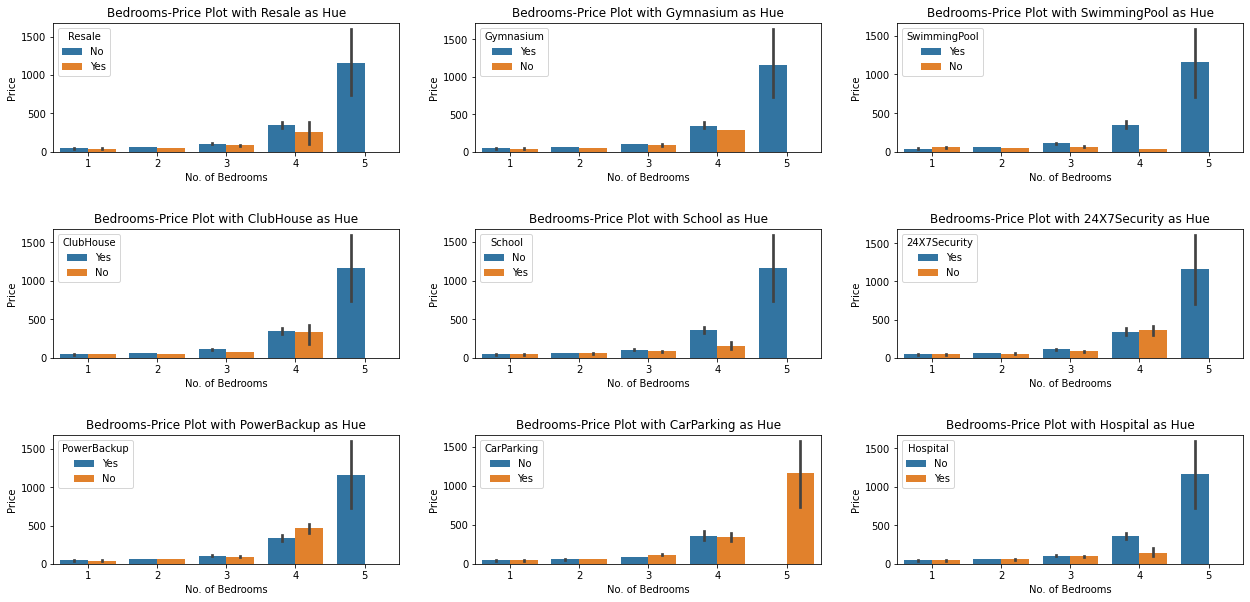

In [143]:
ImpAmenitiesPlot(bangalore_df)

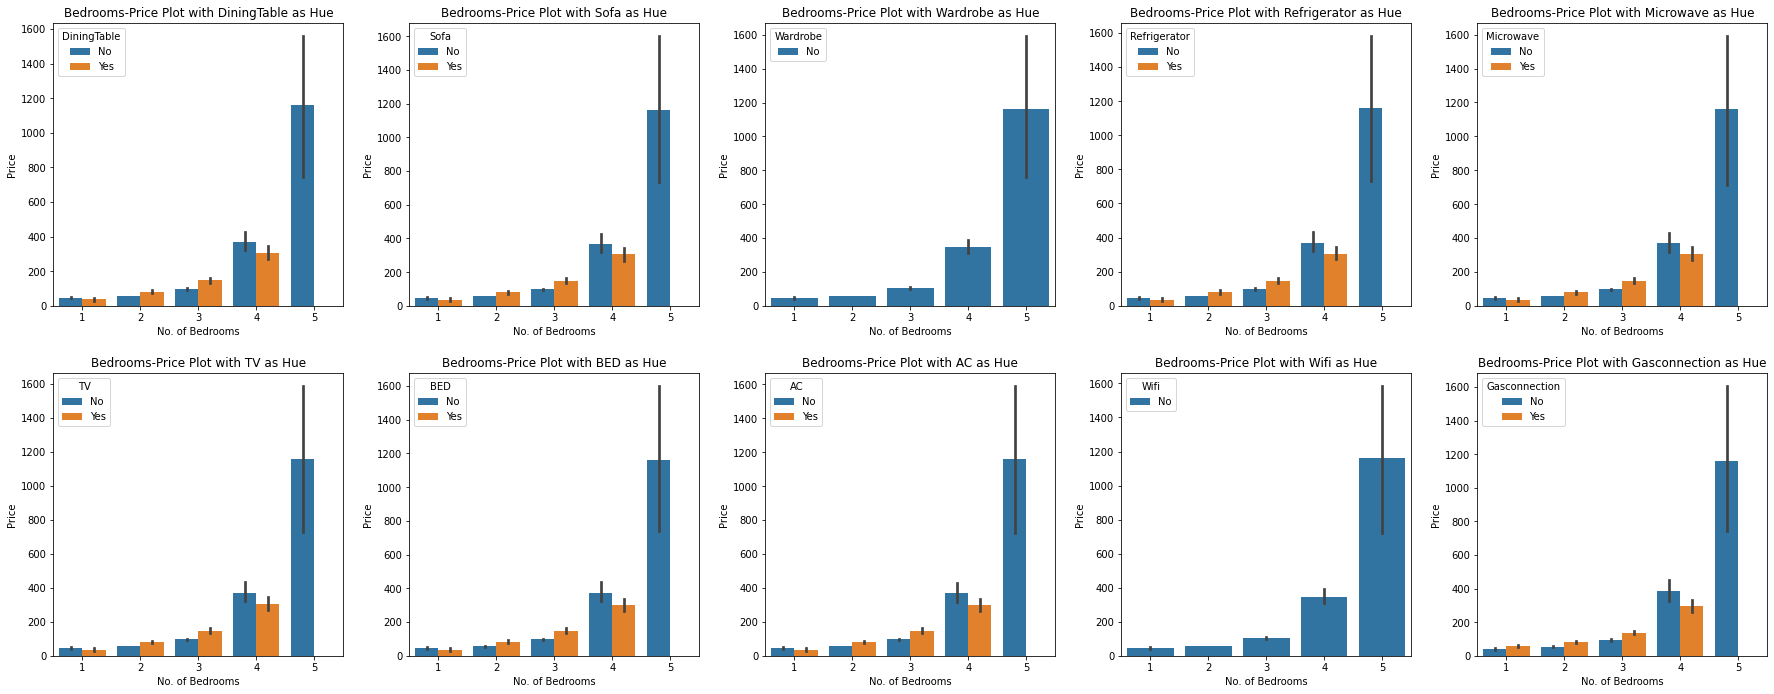

In [144]:
FurnishingPlot(bangalore_df)

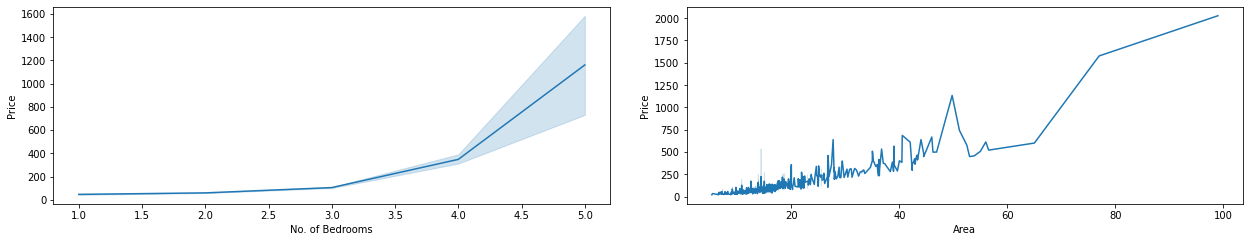

In [145]:
LinePlots(bangalore_df)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


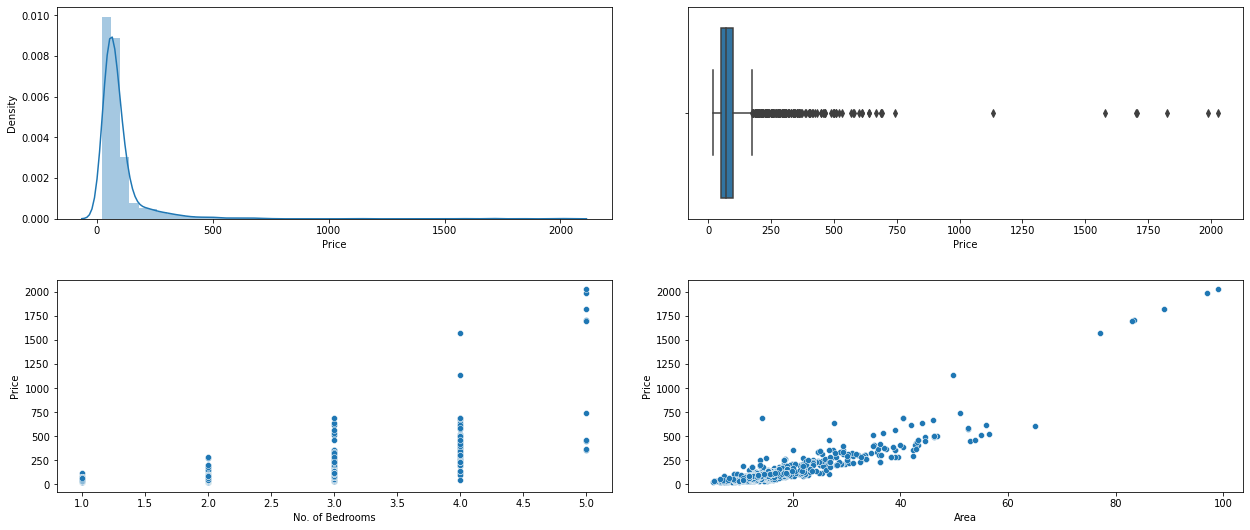

In [146]:
QuadPlot(bangalore_df)

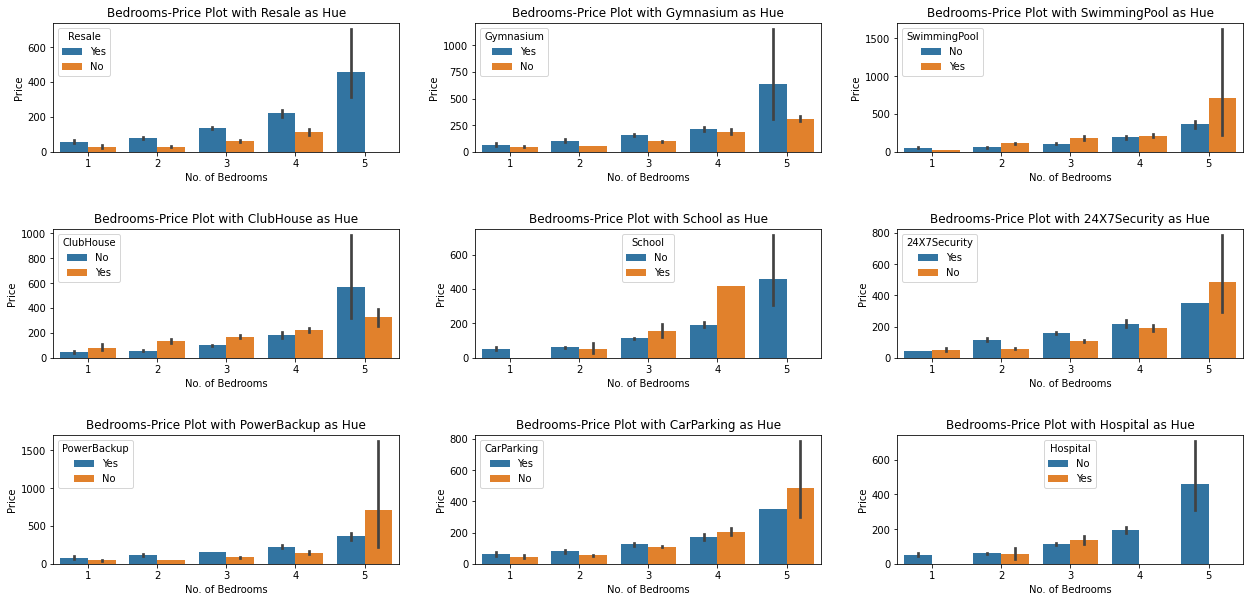

In [147]:
ImpAmenitiesPlot(delhi_df)

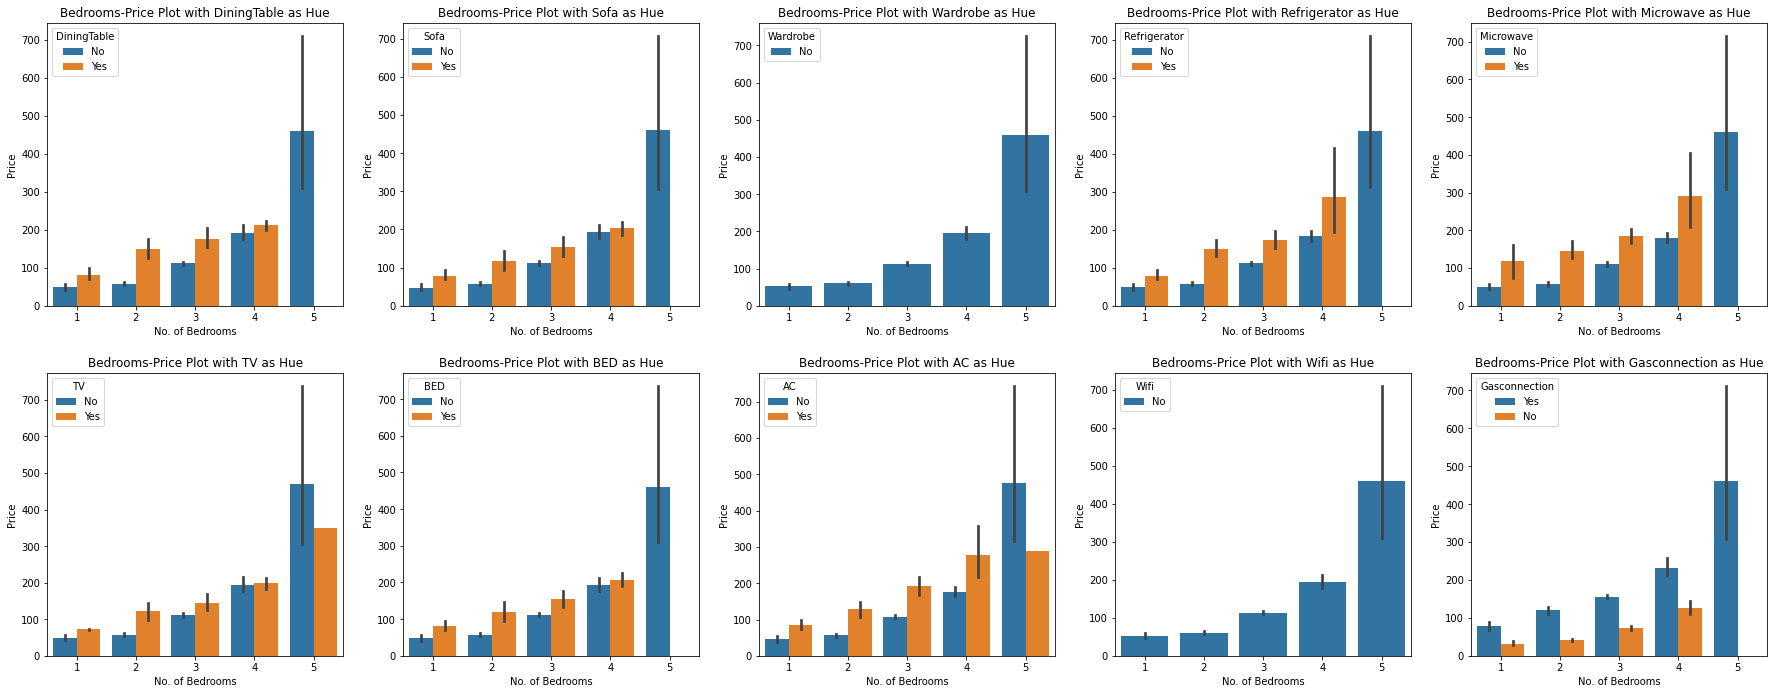

In [148]:
FurnishingPlot(delhi_df)

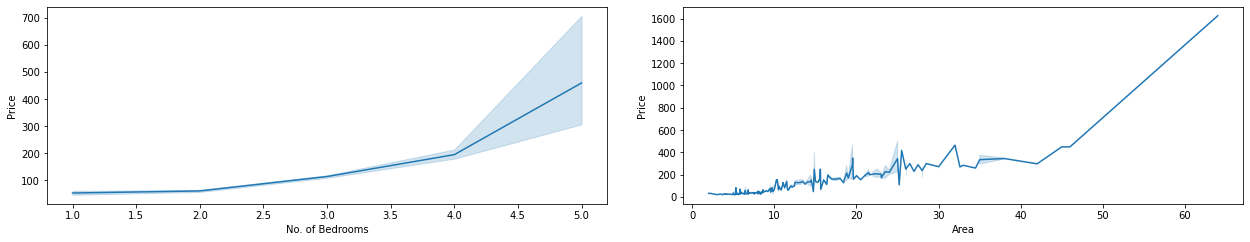

In [149]:
LinePlots(delhi_df)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


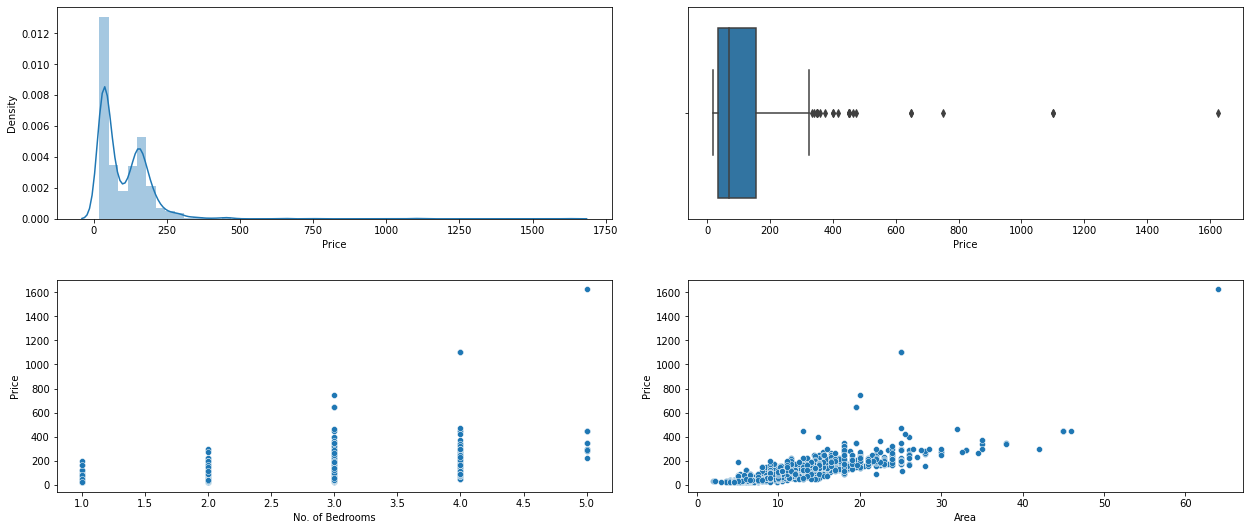

In [150]:
QuadPlot(delhi_df)

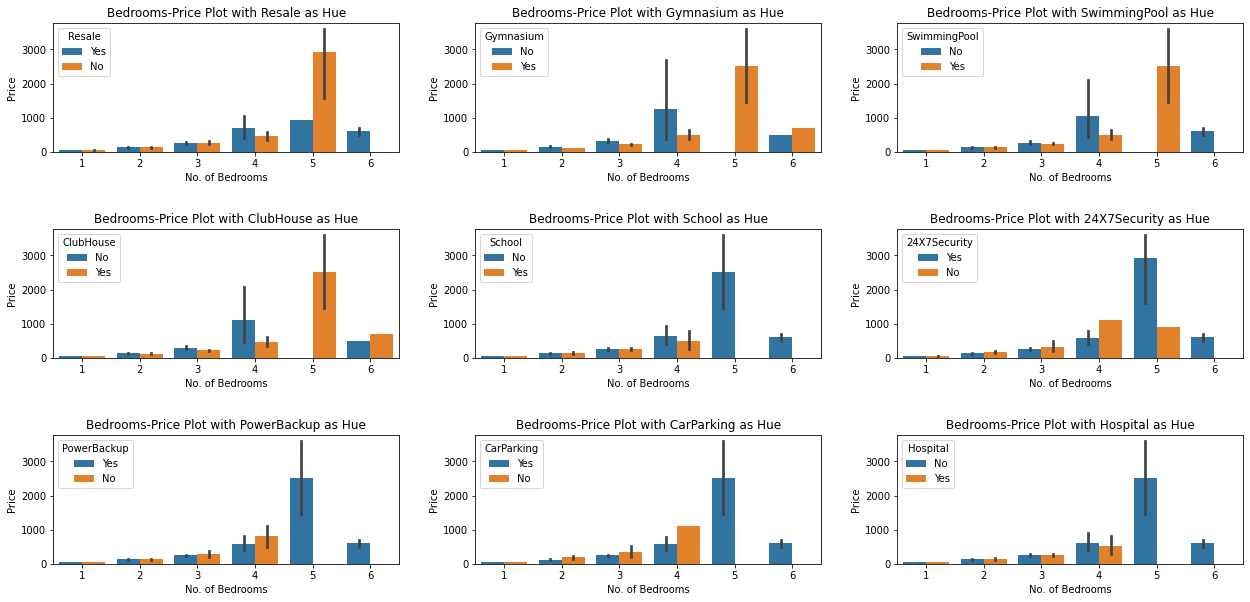

In [151]:
ImpAmenitiesPlot(mumbai_df)

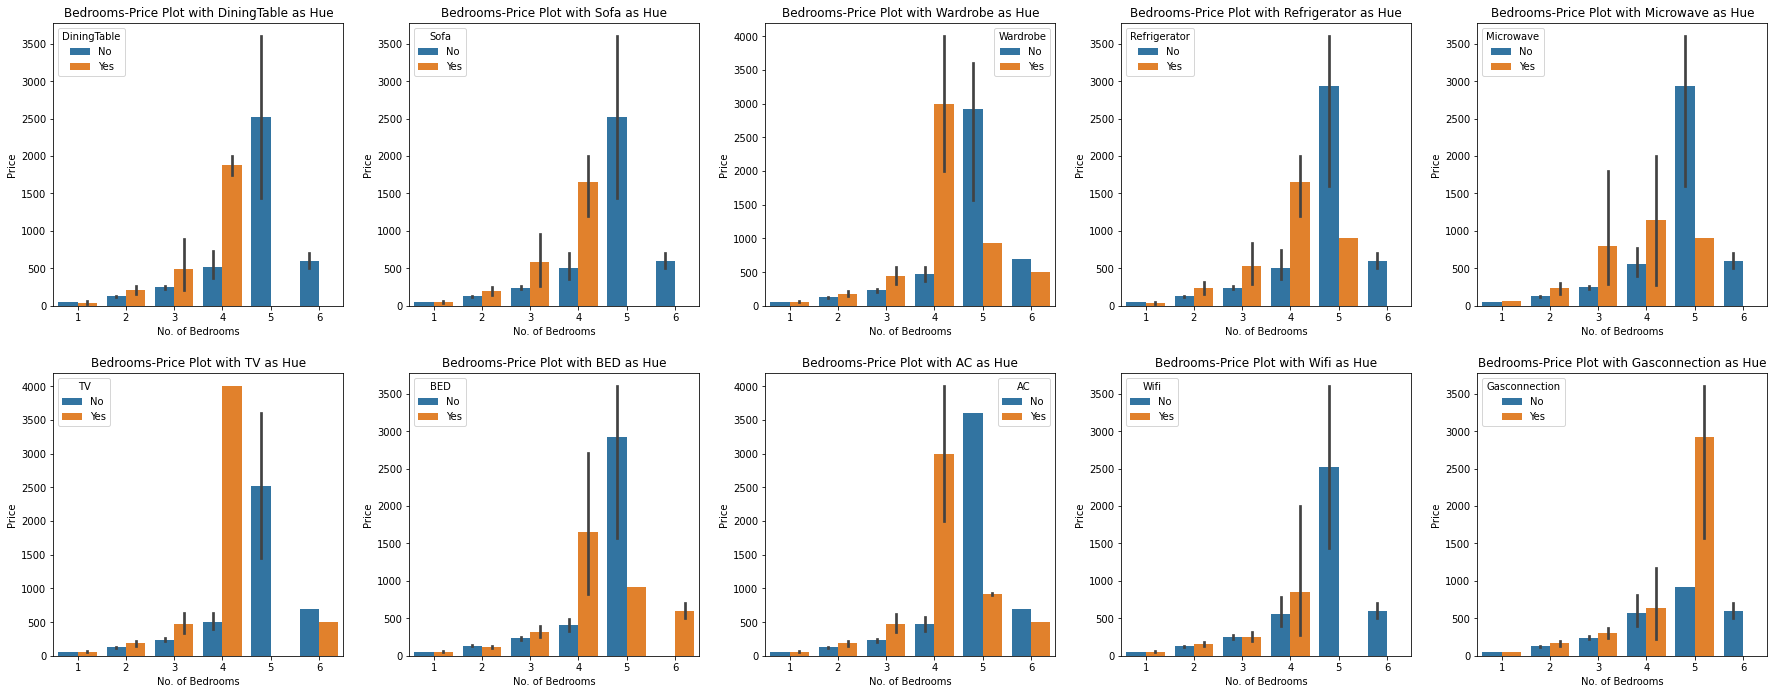

In [152]:
FurnishingPlot(mumbai_df)

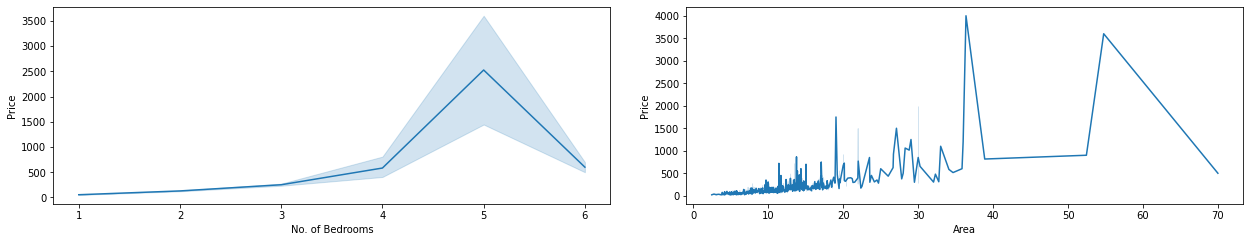

In [153]:
LinePlots(mumbai_df)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


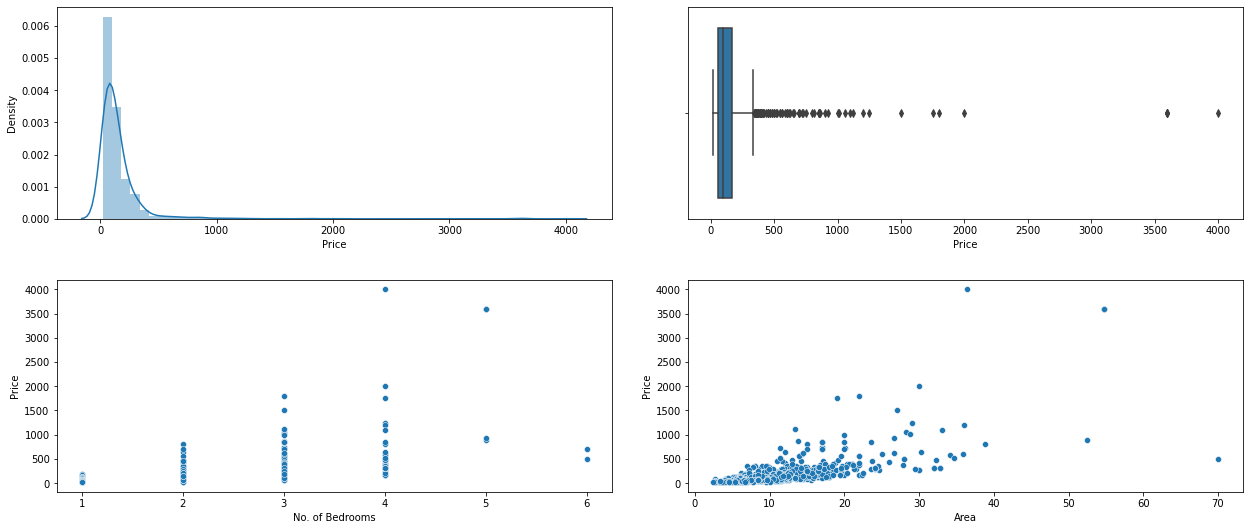

In [154]:
QuadPlot(mumbai_df)